## Vth - Temperature test 

In [17]:
import sys
sys.path.append('..') 

import pandas as pd
import time
import matplotlib.pyplot as plt
import re
from pandas import ExcelWriter
from datetime import datetime
import os
from functools import reduce 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xlrd
from os import devnull
import utils

os.chdir(r"C:\Users\Desi\Desktop\TesiStanford\data_to_analyze\121323-d1114-1-w-tempstab")

In [2]:
col_L = '#1E5986'
col_R = '#BF8F00'
col_diff = "#FF8080"

In [3]:
# if you want to order based on the temperature
df_t = {}
temp = ['25','27','29','30','31','33','35','37','40']
for t in temp: df_t[t] = [pd.read_excel(xlrd.open_workbook(str(os.getcwd())+'\\'+excelfile, logfile=open(devnull, 'w')),engine='xlrd') for excelfile in os.listdir(str(os.getcwd())) if excelfile.endswith('.xls') and t in excelfile]

In [4]:
# if you want the data in the acquisition order
order = ['25','27','29','31','33','35','37','40','35','30','25','30','35','40','35','30','25']
file_names = os.listdir(os.getcwd())

file_info = [(file_name, os.path.getmtime(os.path.join(os.getcwd(), file_name))) for file_name in file_names]

sorted_files = [file_name for file_name, _ in sorted(file_info, key=lambda x: x[1])]

df_t_order = [pd.read_excel(xlrd.open_workbook(excelfile, logfile=open(devnull, 'w')),engine='xlrd') for excelfile in sorted_files if excelfile.endswith('.xls')]

0.39603960396039606


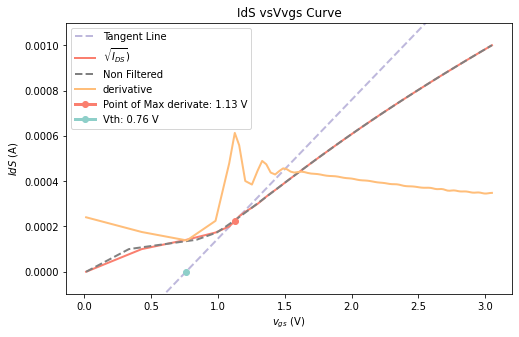

0.7619276555288264
0.39603960396039606


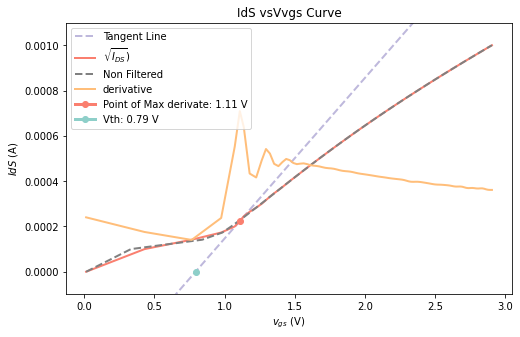

0.7934211667978903
0.39603960396039606


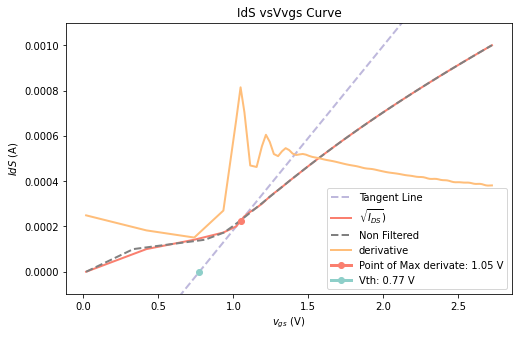

0.7737185442275685
0.39603960396039606


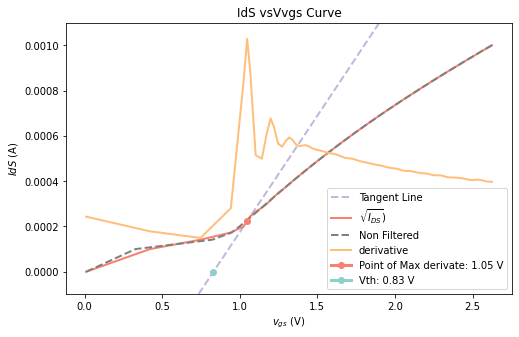

0.8303673239267381
0.39603960396039606


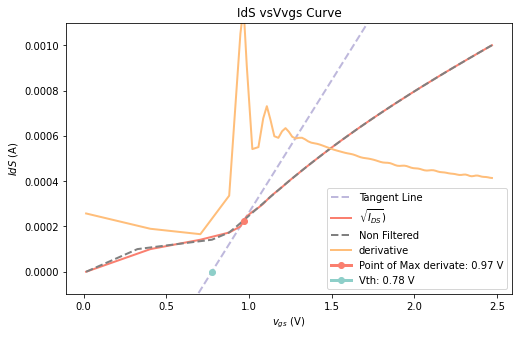

0.7755030746493876
0.39603960396039606


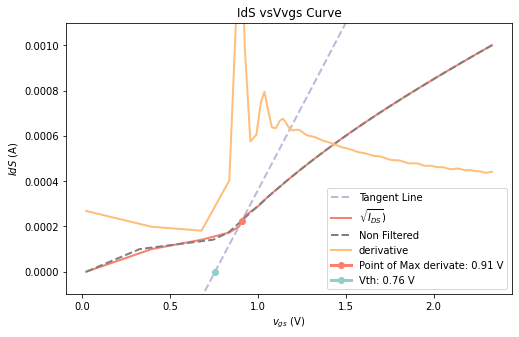

0.7551859349580337
0.39603960396039606


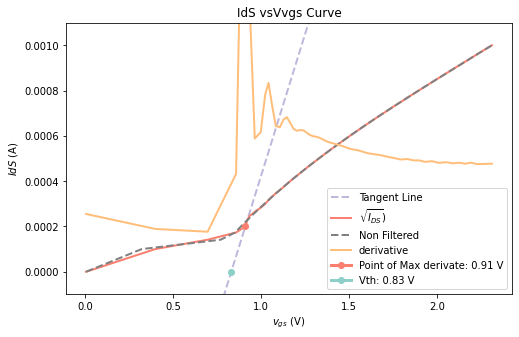

0.8311711382408122
0.39603960396039606


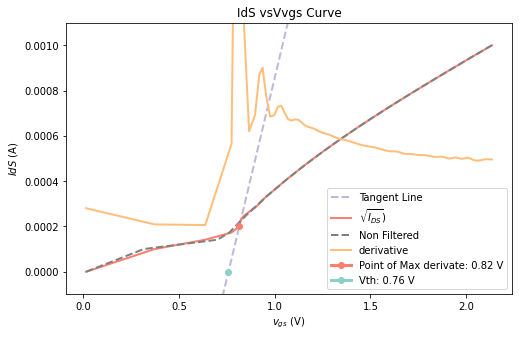

0.7588376074644526
0.39603960396039606


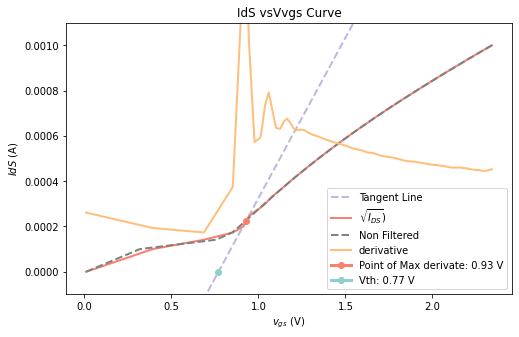

0.7701177582409046
0.39603960396039606


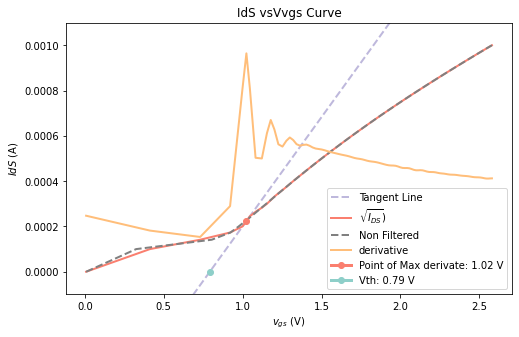

0.7916920157277788
0.39603960396039606


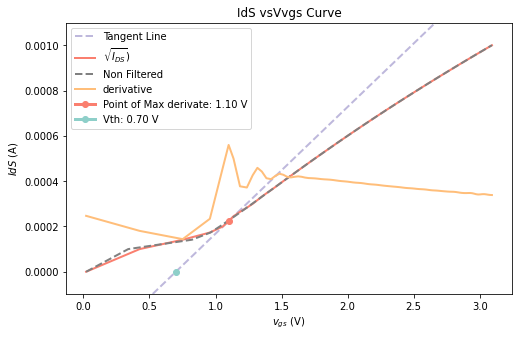

0.6996984100233199
0.39603960396039606


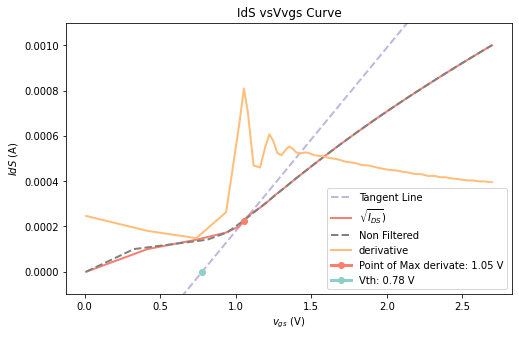

0.7775568613538246
0.39603960396039606


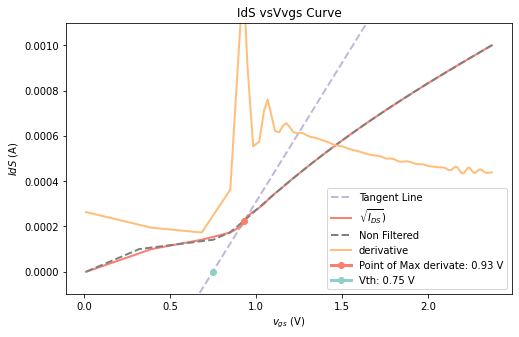

0.7471992483590014
0.39603960396039606


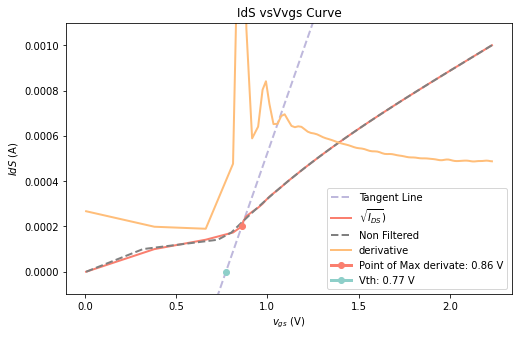

0.7733948801840532
0.39603960396039606


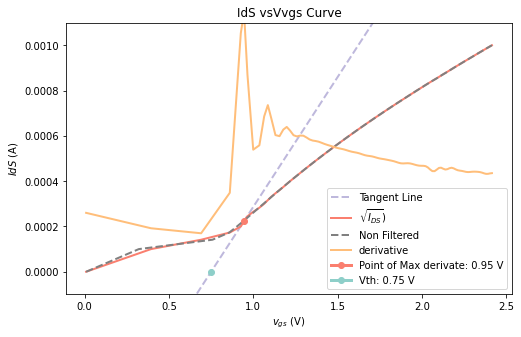

0.7501088155821602
0.39603960396039606


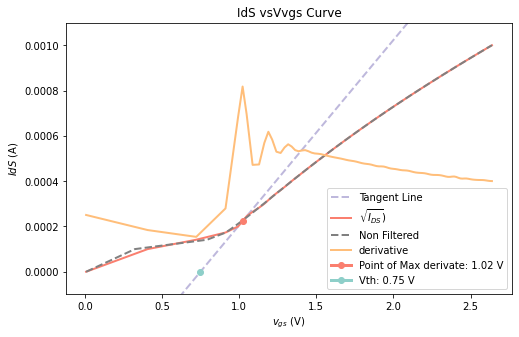

0.749260539459835
0.39603960396039606


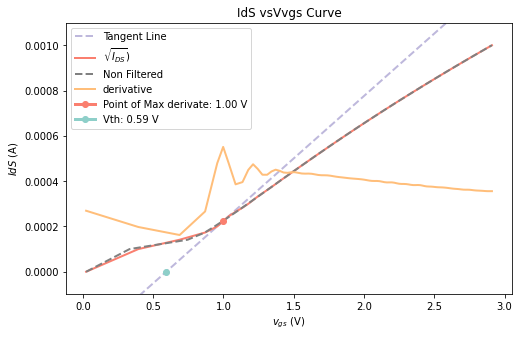

0.5922419730590391


In [5]:
# example
# calculating thr vth for the right transistor of the first data acquired (in the case @ 25C)
for i in df_t_order:
    vth = utils.calculate_vth(i['DrainVLeft'],i['DrainI'], plot = 1)
    print(vth)

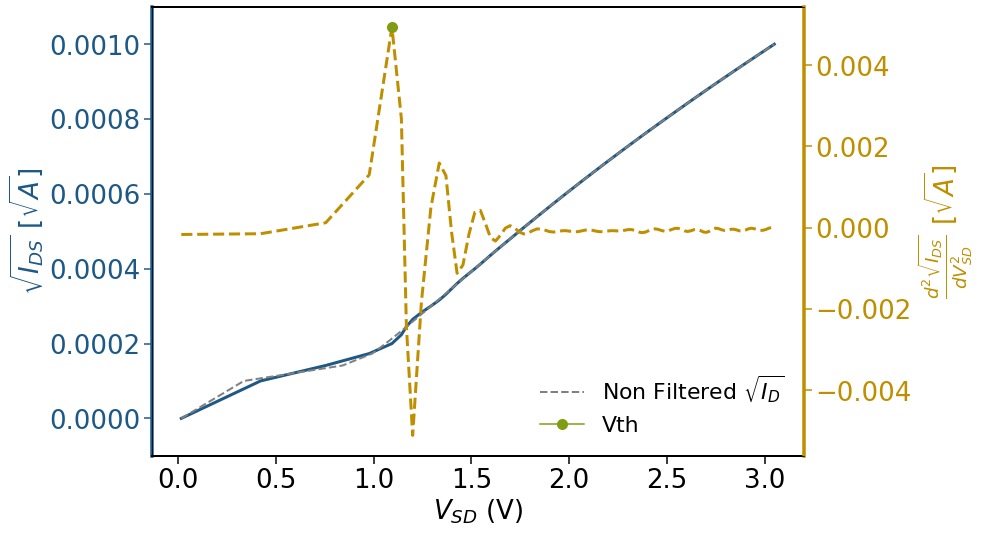

1.0930240403956353

In [6]:
# second derivative method calcuulation - example
utils.calculate_vth_secondder(df_t_order[0]['DrainVLeft'],df_t_order[0]['DrainI'], plot = 1)


In [9]:
order_ = ['25','','29', '','33','','37','','35','','25','','35','','35','','25']

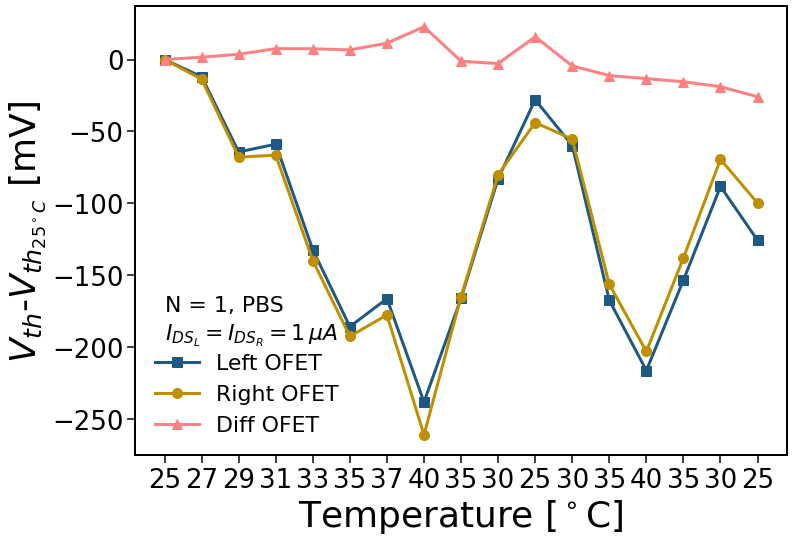

In [24]:
# temperature vs vth shift plot
Vth_t_ord = []

Vth_t_ord = [[utils.calculate_vth_secondder(k['DrainVLeft'],k['DrainI']),utils.calculate_vth_secondder(k['DrainVRight'],k['DrainI'])] for k in df_t_order]
    
fig, ax1 = plt.subplots(figsize=(11.69, 8.26)) # dimension of the plot

# width of the margins
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['top'].set_linewidth(2)
ax1.spines['left'].set_linewidth(2)
ax1.spines['right'].set_linewidth(2)
plt.xticks(range(len(order)), order)

# plot for left, right, diff
plt.plot(range(len(order)), [(i[0]-abs(Vth_t_ord[0][0]))*1000 for i in Vth_t_ord], label='Left OFET', color = col_L, linewidth = 3, marker = 's', markersize = 10)

plt.plot(range(len(order)), [(i[1]-abs(Vth_t_ord[0][1]))*1000 for i in Vth_t_ord], label='Right OFET', color = col_R, linewidth = 3, marker = 'o', markersize = 10)

plt.plot(range(len(order)), [(abs(i[1]-i[0])-abs(Vth_t_ord[0][1]-Vth_t_ord[0][0]))*1000 for i in Vth_t_ord], label='Diff OFET', color = col_diff , linewidth = 3, marker = '^', markersize = 10)


ax1.tick_params(axis='both', width=1.5,length=8,labelsize=26) # settings for the labels
plt.legend(fontsize = 22, frameon=False) 

plt.xlabel('Temperature [$^\circ$C]', fontsize = 36)  # labels title
plt.ylabel('$V_{th}$-$V_{th_{25^\circ C}}$ [mV]', fontsize = 36) 

plt.text(0, -175, 'N = 1, PBS', fontsize = 22) # text to be added (the first two number are the position)
plt.text(0, -195, '$I_{DS_L} = I_{DS_R} = 1 \, \mu A$', fontsize = 22)
plt.savefig(r"C:\Users\Desi\Desktop\TesiStanford\ImagesThesis\VthTemp.jpeg",bbox_inches='tight', dpi = 1200) # save fig, path of where to store the image

### Vth - strain test

In [27]:
os.chdir(r"C:\Users\Desi\Desktop\TesiStanford\data_to_analyze\finalokdevice") # path where the data are stored
path =  os.getcwd()
df_r = {}
strain = ['0','25','50','75','100']
for r in ['1','2','3']: 
    df_r[r] = {}
    for st in strain: df_r[r][st] = [pd.read_excel(xlrd.open_workbook(str(os.getcwd())+'\\'+excelfile, logfile=open(devnull, 'w')),engine='xlrd') for excelfile in os.listdir(str(os.getcwd())) if excelfile.endswith('-'+st+'%.xls') and 'r'+r in excelfile]

In [32]:
df = {}
strain = ['0','25','50','75','100']
for st in strain: df[st] = [pd.read_excel(xlrd.open_workbook(str(os.getcwd())+'\\'+excelfile, logfile=open(devnull, 'w')),engine='xlrd') for excelfile in os.listdir(str(os.getcwd())) if excelfile.endswith('-'+st+'%.xls')]

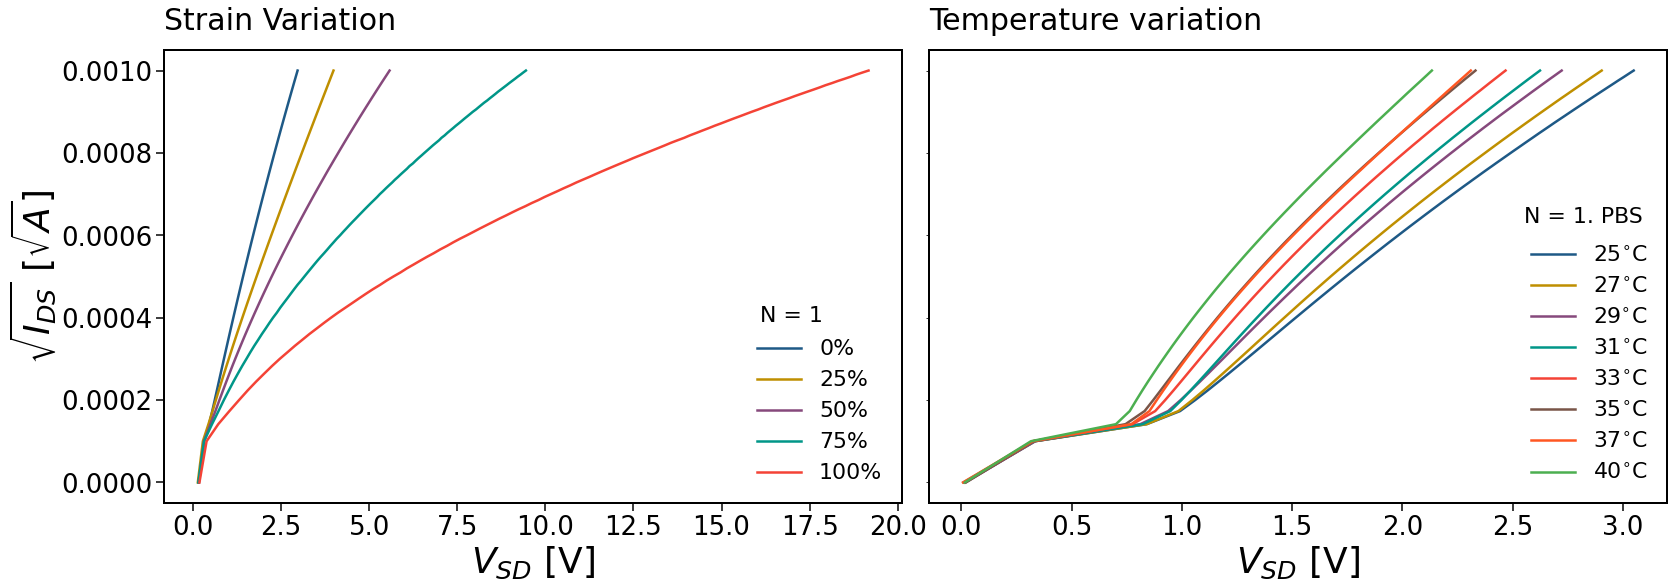

In [29]:
colors =  ['#1E5986', '#BF8F00', '#86497C', '#009688', '#F44336', '#795548', '#FF5722', '#4CAF50']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(23.4, 8.27), sharey=True)  # 2 subplots, 1 row, 2 columns
for ax in [ax1, ax2]:
    for spine in ax.spines.values():
        spine.set_linewidth(2) # width of the margins
        
# Left Plot
for i, st in enumerate(strain):
    ax1.plot(df_r['1'][st][1]['DrainVLeft'], np.sqrt(df_r['2']['0'][0]['DrainI']), label=st+'%', linewidth=2.5, color=colors[i])
ax1.legend(fontsize = 22, frameon=False)
ax1.tick_params(axis='both', width=1.5,length=8,labelsize=26)
ax1.set_xlabel('$V_{SD}$ [V]', fontsize= 36)
ax1.set_ylabel('$\sqrt{I_{DS}}$ [$\sqrt{A}$]', fontsize=36) 
ax1.set_title('Strain Variation', fontsize=30, loc='left', pad=20)  # Titolo a sinistra
ax1.text(16.1, 0.00039, 'N = 1', fontsize = 22)

# Right plot
for i, df in enumerate(df_t_order[:8]):
    ax2.plot(df['DrainVLeft'], np.sqrt(df['DrainI']), label=order[i]+'$^{\circ}$C', linewidth=2.5, color=colors[i])
plt.legend(loc = 'lower right',fontsize = 22, frameon=False)
ax2.tick_params(axis='x', width=1.5,length=8,labelsize=26)
ax2.set_xlabel('$V_{SD}$ [V]', fontsize=36)
ax2.set_title('Temperature variation', fontsize=30, loc='left', pad=20)  # Titolo a sinistra
ax2.text(2.55, 0.00063, 'N = 1. PBS', fontsize = 22)

# Spaziatura tra i subplot
plt.tight_layout()

plt.savefig(r"C:\Users\Desi\Desktop\TesiStanford\ImagesThesis\VthstrainVSTemp.jpeg", dpi = 1200)

plt.show()

In [34]:
# Calcola i valori di Vth per ciascuna combinazione di strain
vth_values = [[[utils.calculate_vth_secondder(i['DrainVLeft'], df['0'][0]['DrainI']),
                utils.calculate_vth_secondder(i['DrainVRight'], df['0'][0]['DrainI'])] 
               for i in df[st]] 
              for st in strain]

# Calcola le medie dei valori di Vth
mean = [np.mean(values, axis=0) for values in vth_values]

# Calcola le deviazioni standard dei valori di Vth
std = [np.std(values, axis=0) for values in vth_values]

# Calcola le deviazioni standard della differenza tra i valori di Vth dei transistor sinistro e destro
std_diff = [np.std(np.array([values[j][0] for j in range(len(values))]) - 
                    np.array([values[j][1] for j in range(len(values))]))
            for values in vth_values]


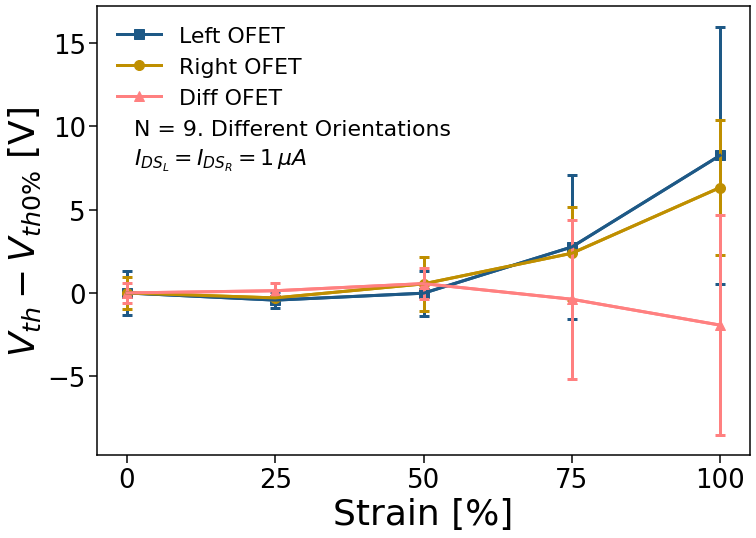

In [38]:
mean_L = np.array([i[0] for i in mean])
mean_L = mean_L- mean_L[0]
mean_R = np.array([i[1] for i in mean])
mean_R = mean_R- mean_R[0]

fig, ax1 = plt.subplots(figsize=(11.69, 8.26))
ax1.spines['bottom'].set_linewidth(1.5)
ax1.spines['top'].set_linewidth(1.5)
ax1.spines['left'].set_linewidth(1.5)
ax1.spines['right'].set_linewidth(1.5)
plt.plot(strain,mean_L,label = 'Left OFET', color = col_L, linewidth = 3, marker = 's', markersize= 10)
plt.errorbar(strain,mean_L, yerr = [i[0] for i in std], color = col_L, linewidth = 3, capsize = 5,capthick = 3)
plt.plot(strain,mean_R,label = 'Right OFET', color = col_R, linewidth = 3, marker = 'o', markersize= 10)
plt.errorbar(strain,mean_R, yerr = [i[1] for i in std], color = col_R, linewidth = 3, capsize = 5,capthick = 3)
plt.plot(strain,np.array(mean_R)-np.array(mean_L), label = 'Diff OFET', color = col_diff, linewidth = 3, marker = '^', markersize= 10)
plt.errorbar(strain,np.array(mean_R)-np.array(mean_L), yerr = std_diff, color = col_diff, linewidth = 3, capsize = 5,capthick = 3)
plt.legend(fontsize = 22, frameon=False)
#plt.grid()
ax1.tick_params(axis='both', width=1.5,length=8,labelsize=26)
ax1.text(0.05, 9.5, 'N = 9. Different Orientations', fontsize = 22)
ax1.text(0.05, 7.7, '$I_{DS_L} = I_{DS_R} = 1 \, \mu A$', fontsize = 22)
plt.legend(loc = 2,fontsize = 22, frameon=False)
ax1.tick_params(axis='both', labelsize=26)
plt.xlabel('Strain [%]', fontsize = 36)
plt.ylabel('$V_{th}-V_{th0\%}$ [V]', fontsize = 36) 

#plt.title('Mean of values @ 1uA, different orientations first, N = 9')
plt.savefig(r"C:\Users\Desi\Desktop\TesiStanford\ImagesThesis\VthStrainAll.jpeg", dpi = 1200)

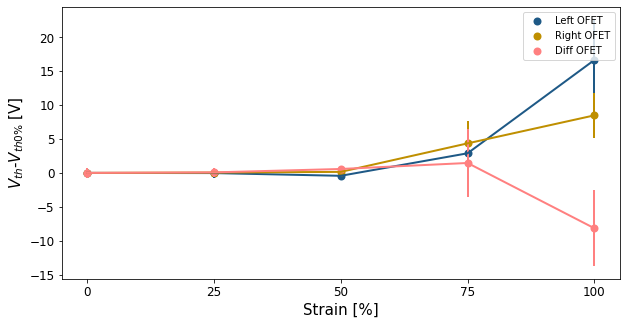

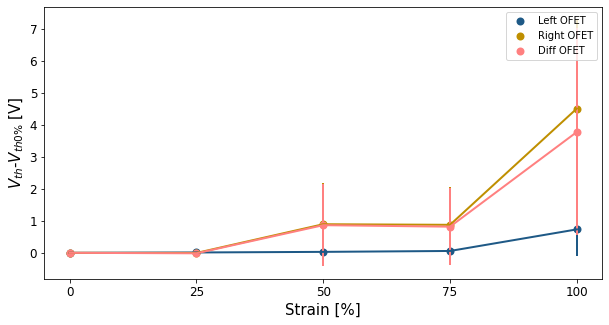

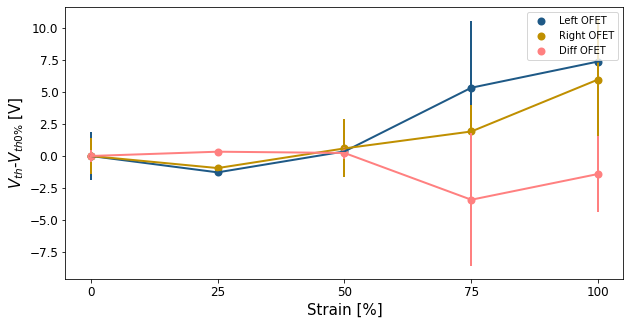

In [43]:
Vth_row2_strain = []
strain = ['0','25','50','75','100']
for row in ['1','2','3']:
    #if row == '1':
    #    for k in strain:
    #        print(k)
    #        [calculate_vth_secondder(i['DrainVLeft'],df_r['2']['0'][0]['DrainI'],1) for i in df_r[row][k]]
    Vth_t_ord = [[np.mean([utils.calculate_vth_secondder(i['DrainVLeft'],df_r['2']['0'][0]['DrainI']) for i in df_r[row][k]],axis = 0),np.mean([utils.calculate_vth_secondder(i['DrainVRight'],df_r['2']['0'][0]['DrainI']) for i in df_r[row][k]],axis = 0)] for k in strain]
    Vth_t_std = [[np.std([utils.calculate_vth_secondder(i['DrainVLeft'],df_r['2']['0'][0]['DrainI']) for i in df_r[row][k]],axis = 0),np.std([utils.calculate_vth_secondder(i['DrainVRight'],df_r['2']['0'][0]['DrainI']) for i in df_r[row][k]],axis = 0)] for k in strain]

    fig, ax1 = plt.subplots(figsize=(10, 5))
    plt.scatter(strain, [i[0]-Vth_t_ord[0][0] for i in Vth_t_ord], label='Left OFET', color = col_L, linewidth = 2)
    plt.errorbar(strain,[i[0]-Vth_t_ord[0][0] for i in Vth_t_ord] , yerr = [i[0] for i in Vth_t_std]  , color = col_L, linewidth = 2)

    plt.scatter(strain, [i[1]-Vth_t_ord[0][1] for i in Vth_t_ord], label='Right OFET', color = col_R, linewidth = 2)
    plt.errorbar(strain,[i[1]-Vth_t_ord[0][1] for i in Vth_t_ord] , yerr = [i[1] for i in Vth_t_std]  , color = col_R, linewidth = 2)

    plt.scatter(strain, [(i[1]-i[0])-(Vth_t_ord[0][1]-Vth_t_ord[0][0]) for i in Vth_t_ord], label='Diff OFET', color = col_diff, linewidth = 2)
    std_diff = np.std([[(utils.calculate_vth_secondder(i['DrainVLeft'],df_r['2']['0'][0]['DrainI'])-utils.calculate_vth_secondder(i['DrainVRight'],df_r['2']['0'][0]['DrainI'])) for i in df_r[row][k]] for k in strain], axis = 1) 
    plt.errorbar(strain, [(i[1]-i[0])-(Vth_t_ord[0][1]-Vth_t_ord[0][0]) for i in Vth_t_ord] , yerr = std_diff, color = col_diff, linewidth = 2)

    plt.legend()
    ax1.tick_params(axis='both', labelsize=12)
    plt.xlabel('Strain [%]', fontsize = 15)
    plt.ylabel('$V_{th}$-$V_{th0\%}$ [V]', fontsize = 15) 

In [ ]:
# saving data in xlsx
data = [order, [i[0] for i in Vth_t_ord], [i[1] for i in Vth_t_ord]]
table = pd.DataFrame(data).transpose().rename(columns = {0: 'Temperature [C]', 1: 'Vth Left [V]', 2: 'Vth Right [V]'}).set_index('Temperature [C]')
table.to_excel(r'C:\Users\Desi\Desktop\TesiStanford\images-results\table_Vth_temperature.xlsx')

Vth for the strecthing test

In [ ]:
Stretch_vth = pd.read_excel(r"C:\Users\Desi\Desktop\TesiStanford\data_to_analyze\d052223-r2c2-I-V curves.xlsx")
Stretch_vth

,DrainI,DrainI-uA,DrainV-0%,GateV-0%,DIFF-0%,DrainV-25%,GateV-25%,DIFF-25%,DrainV-50%,GateV-50%,DIFF-50%,DrainV-100%,GateV-100%,DIFF-100%
0,0.000000e+00,0.00,0.00146,0.31806,0.31660,0.000369,0.42674,0.42637,0.000872,0.45624,0.45537,0.00698,0.81163,0.80466
1,1.000000e-08,0.01,0.68637,0.67633,0.01004,0.563510,0.67074,0.10722,0.583630,0.71513,0.13149,0.68473,1.32896,0.64422
2,2.000000e-08,0.02,0.93708,0.81784,0.11924,0.812180,0.79508,0.01710,0.879600,0.85566,0.02394,1.46561,1.67260,0.20699
3,3.000000e-08,0.03,1.00253,0.90537,0.09716,0.921780,0.89502,0.02676,1.013600,0.96315,0.05045,1.70429,1.89560,0.19131
4,4.000000e-08,0.04,1.07225,0.98396,0.08829,0.999310,0.97648,0.02284,1.101130,1.05205,0.04908,1.96669,2.13536,0.16867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,9.600000e-07,0.96,3.48922,3.33915,0.15007,4.067080,4.13712,0.07004,6.849260,6.78179,0.06747,18.68621,16.77653,1.90968
97,9.700000e-07,0.97,3.50918,3.35533,0.15384,4.095660,4.16490,0.06924,6.911840,6.83789,0.07395,18.81503,16.92863,1.88640
98,9.800000e-07,0.98,3.52908,3.37611,0.15296,4.123380,4.19294,0.06956,6.973600,6.89200,0.08160,18.98210,17.06158,1.92052
99,9.900000e-07,0.99,3.54873,3.39393,0.15480,4.149630,4.22242,0.07279,7.030920,6.93850,0.09242,19.15909,17.18886,1.97024


### linear regression study and correlation study bw temperature response and vth shift

0.8881551700072432


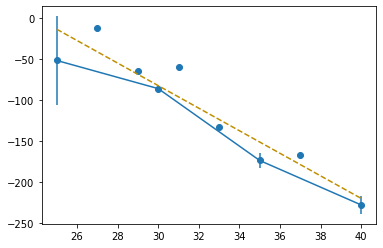

In [58]:
# linear regression bw temperature and vth shifts

temp_25 = [np.mean(np.array([y[0],y[10],y[-1]])),np.std(np.array([y[0],y[10],y[-1]]))]
temp_40 = [np.mean(np.array([y[7],y[13]])),np.std(np.array([y[7],y[13]]))]
temp_30 = [np.mean(np.array([y[-2],y[9]])),np.std(np.array([y[-2],y[9]]))]
temp_35 = [np.mean(np.array([y[5],y[8],y[12]])),np.std(np.array([y[5],y[8],y[12]]))]
y_ = [temp_25[0],y[1],y[2],temp_30[0],y[3],y[4],temp_35[0],y[6],temp_40[0]]
x_ = np.array([25,27,29,30,31,33,35,37,40])


coefficients = np.polyfit(x_, y_, 1)
m, q = coefficients

# compute regression line
line = m *x_ + q
# compute R-squared
correlation_matrix = np.corrcoef(x_,  y_)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
print(r_squared)
plt.scatter(x_,y_)
plt.errorbar([25,30,35,40],[temp_25[0],temp_30[0],temp_35[0],temp_40[0]],[temp_25[1],temp_30[1],temp_35[1],temp_40[1]])
plt.plot(x_,line,'--', color = col_R)

0.7912130361161017


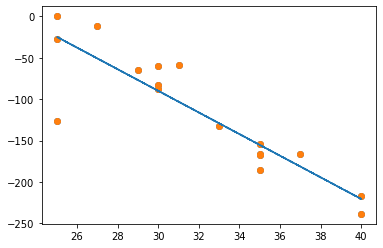

In [47]:
plt.scatter(x,y)
coefficients = np.polyfit(x, y, 1)
m, q = coefficients

# Calcolare la retta di regressione
line = m *x + q
# Calcolare il coefficiente di correlazione (R-squared)
correlation_matrix = np.corrcoef(x,  y)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
print(r_squared)
plt.scatter(x,y)
plt.plot(x,line,'--', color = col_R)

In [61]:
y_temp = [0.0,
 -143.94969940185564,
 -324.0719795227052,
 -421.32463455200184,
 -576.4241218566895,
 -711.5476131439209,
 -730.8650493621824,
 -906.7609786987302,
 -701.1342525482175,
 -465.3196334838867,
 41.861343383788885,
 -350.43277740478504,
 -672.6536750793457,
 -810.0170135498046,
 -629.7111511230469,
 -406.67934417724626,
 -138.34753036499015]

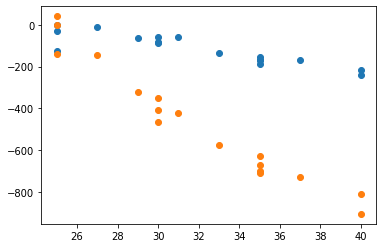

In [65]:
plt.scatter(x,y)
plt.scatter(x,y_temp)

In [66]:
import numpy as np
import scipy.stats

print(scipy.stats.pearsonr(y_temp, y))    # Pearson's r
print(scipy.stats.spearmanr(y_temp, y))   # Spearman's rho
print(scipy.stats.kendalltau(y_temp, y))  # Kendall's tau

PearsonRResult(statistic=0.90437278648156, pvalue=6.27020588462714e-07)
SignificanceResult(statistic=0.9044117647058825, pvalue=6.251789855978917e-07)
SignificanceResult(statistic=0.764705882352941, pvalue=2.0270077800034225e-06)


In [30]:
print(np.mean([(abs(i[1]-i[0])-abs(Vth_t_ord[0][1]-Vth_t_ord[0][0]))*1000 for i in Vth_t_ord]))
print(np.std([(abs(i[1]-i[0])-abs(Vth_t_ord[0][1]-Vth_t_ord[0][0]))*1000 for i in Vth_t_ord]))


-0.929515007051786
12.515807609563772
